In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
# Split into training (70%) and testing (30%) sets
train_df, test_df = train_test_split(df, test_size=0.7, random_state=123)

# Display the sizes of the splits
print(f"Training set: {train_df.shape}")
print(f"Testing set: {test_df.shape}")

Training set: (9000, 25)
Testing set: (21000, 25)


In [5]:
X_train = train_df.drop(columns=["default.payment.next.month", "ID"])
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns=["default.payment.next.month", "ID"])
y_test = test_df["default.payment.next.month"]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [6]:
# Summary statistics
print(train_df.describe())

                 ID     LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   9000.000000    9000.00000  9000.000000  9000.000000  9000.000000   
mean   15069.999889  166457.52000     1.601556     1.859333     1.551778   
std     8627.548192  129368.23268     0.489605     0.788003     0.520485   
min        1.000000   10000.00000     1.000000     0.000000     0.000000   
25%     7596.750000   50000.00000     1.000000     1.000000     1.000000   
50%    15156.500000  140000.00000     2.000000     2.000000     2.000000   
75%    22514.750000  240000.00000     2.000000     2.000000     2.000000   
max    30000.000000  800000.00000     2.000000     6.000000     3.000000   

               AGE        PAY_0        PAY_2        PAY_3        PAY_4  ...  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  ...   
mean     35.523111    -0.004778    -0.139778    -0.177222    -0.220556  ...   
std       9.214976     1.118334     1.183759     1.188545     1.162590  ...   

In [7]:
missing_vals_cols = train_df.columns[train_df.isnull().any()].tolist()
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(missing_vals_cols)
print(numeric_cols)

[]
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


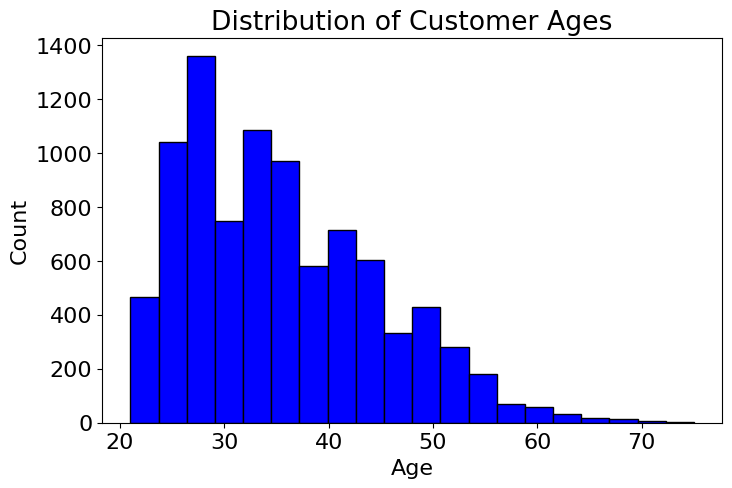

In [8]:
# Plot histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(train_df["AGE"], bins=20, color="blue", edgecolor="black")
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

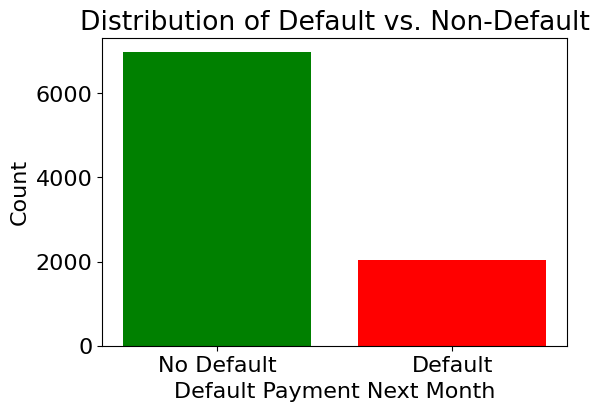

In [9]:
# Count occurrences of default (0 = No, 1 = Yes)
default_counts = train_df["default.payment.next.month"].value_counts()

# Bar plot for default vs non-default
plt.figure(figsize=(6, 4))
plt.bar(["No Default", "Default"], default_counts, color=["green", "red"])
plt.title("Distribution of Default vs. Non-Default")
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.show()

In [10]:
# Calculate proportion of defaulters
total_customers = len(train_df)
default_rate = train_df["default.payment.next.month"].mean() * 100
print(f"Default Rate: {default_rate:.2f}% of customers defaulted on their payments.")

Default Rate: 22.57% of customers defaulted on their payments.


In [11]:
# Dummy prediction (for illustration purposes)
y_true = train_df["default.payment.next.month"]
y_pred = train_df["default.payment.next.month"]  # Pretend we predicted everything correctly

# Classification report (Precision, Recall, F1-score)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6969
           1       1.00      1.00      1.00      2031

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



## Final Summary
- EDA techniques used: Summary statistics, histograms, bar plots.
- Key observations:
    - Most customers are aged 25-50.
    - The dataset is imbalanced (only ~22% are defaulters).
- Best metric for model evaluation: F1-score or ROC-AUC, instead of accuracy.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [21]:
# # Create the new features on the training and test data separately
# for df_to_process in [X_train, X_test]:
#     df_to_process["Debt_Ratio"] = df_to_process[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis=1) / df_to_process["LIMIT_BAL"]
#     df_to_process["Avg_Bill"] = df_to_process[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)
#     df_to_process["Avg_Payment"] = df_to_process[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)
#     df_to_process["Pay_Bill_Ratio"] = df_to_process["PAY_AMT1"] / (df_to_process["BILL_AMT1"] + 1)
#     df_to_process["Recent_Late_Payment"] = (df_to_process["PAY_0"] > 0).astype(int)

# Create the new features on the training and test data separately
for df_to_process in [X_train, X_test]:
    # 1. Debt_Ratio calculation
    total_bill = df_to_process[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", 
                               "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis=1)
    df_to_process["Debt_Ratio"] = np.where(
        df_to_process["LIMIT_BAL"] > 0,
        total_bill / df_to_process["LIMIT_BAL"],
        0
    )
    df_to_process["Debt_Ratio"] = df_to_process["Debt_Ratio"].clip(0, 100)  # Limit maximum ratio
    
    # 2. Average calculations
    df_to_process["Avg_Bill"] = df_to_process[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", 
                                              "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)
    df_to_process["Avg_Payment"] = df_to_process[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", 
                                                 "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)
    
    # 3. Pay_Bill_Ratio calculation
    denominator = df_to_process["BILL_AMT1"].clip(1)  # Ensure minimum value of 1
    df_to_process["Pay_Bill_Ratio"] = (df_to_process["PAY_AMT1"] / denominator).clip(0, 1)
    
    # 4. Recent_Late_Payment (binary feature)
    df_to_process["Recent_Late_Payment"] = (df_to_process["PAY_0"] > 0).astype(int)
    
    # 5. Replace any remaining infinities or NaNs
    df_to_process.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_to_process.fillna(0, inplace=True)

# Verify no infinities or NaNs remain
print("Checking for infinite values:", np.any(np.isinf(X_train.values)))
print("Checking for NaN values:", np.any(np.isnan(X_train.values)))


# Display updated dataset
print(df.head())

Checking for infinite values: False
Checking for NaN values: False
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AM

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

| Feature Type               | Columns                                           | Transformation                  |
|----------------------------|---------------------------------------------------|---------------------------------|
| Numerical                  | LIMIT_BAL, AGE, Debt_Ratio, Avg_Bill, Avg_Payment, Pay_Bill_Ratio | Standard Scaling               |
| Categorical                | SEX, EDUCATION, MARRIAGE, Recent_Late_Payment     | One-Hot Encoding                |
| Ordinal (Past Payments)    | PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6           | Kept as Numeric (No Transformation) |

In [22]:
# Define feature categories
num_features = ["LIMIT_BAL", "AGE", "Debt_Ratio", "Avg_Bill", "Avg_Payment", "Pay_Bill_Ratio"]
cat_features = ["SEX", "EDUCATION", "MARRIAGE", "Recent_Late_Payment"]
ordinal_features = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]  # Kept as numeric

In [23]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [24]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value=0, strategy='constant')),
                ('onehot', OneHotEncoder(drop='first', sparse_output=False))])

In [36]:
# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
        ('ord', StandardScaler(), ordinal_features)
    ],
    remainder='drop'  # Drop any other columns
)

print("Preprocessing pipeline configured successfully.")

Preprocessing pipeline configured successfully.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [37]:
results_dict = {}

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [38]:
dummy_clf = DummyClassifier(random_state=123)
pipe = make_pipeline(preprocessor, dummy_clf)
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_clf, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.000),0.001 (+/- 0.000),0.774 (+/- 0.000),0.774 (+/- 0.000)


## Observations:
- Accuracy is 77.4%, meaning the majority class dominates predictions.
- No variation across folds: This suggests the model is always predicting the most frequent class (likely "non-default").
- Fast fitting time (~0.002 sec): Since DummyClassifier doesn’t perform actual learning, it's computationally inexpensive.

## Significance:
- Any real model must significantly outperform this baseline to be considered useful.
- Since the dataset is imbalanced (only ~22% default), accuracy alone is misleading. Future models should also be evaluated using metrics like F1-score, precision, recall, and ROC-AUC.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [53]:
# Create a simpler logistic regression model
log_reg = LogisticRegression(
    max_iter=5000,
    random_state=123,
    solver='liblinear',
    C=1.0
)

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

# Parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create and run GridSearchCV
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Store results in results_dict
results_dict["logistic"] = mean_std_cross_val_scores(
    grid_search.best_estimator_, 
    X_train, 
    y_train, 
    cv=5, 
    return_train_score=True
)

# Display results
results_df = pd.DataFrame(results_dict).T
print("\nCross-validation Results:")
print(results_df)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Print detailed CV results for each C value
print("\nDetailed cross-validation results for each C value:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"C={param['classifier__C']}: {mean:.4f} (+/- {std*2:.4f})")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................classifier__C=0.001; total time=   0.1s
[CV] END ................................classifier__C=0.001; total time=   0.1s
[CV] END ................................classifier__C=0.001; total time=   0.1s
[CV] END ................................classifier__C=0.001; total time=   0.1s
[CV] END ................................classifier__C=0.001; total time=   0.1s
[CV] END .................................classifier__C=0.01; total time=   0.1s
[CV] END .................................classifier__C=0.01; total time=   0.1s
[CV] END .................................classifier__C=0.01; total time=   0.1s
[CV] END .................................classifier__C=0.01; total time=   0.1s
[CV] END .................................classifier__C=0.01; total time=   0.1s
[CV] END ..................................classifier__C=0.1; total time=   0.1s
[CV] END ..................................classi


### Cross-Validation Results Summary:
- Best Parameters: \( C = 0.01 \)
- Best Cross-Validation Accuracy: \( 0.8098 \)

### Summary of Results:
1. **Model Configuration:**
   - Best \( C \) parameter: \( 0.01 \)
   - Solver: `liblinear`
   - Features used: 28 total features

2. **Performance Analysis:**
   - The model achieves a mean accuracy of \( 0.810 \) with a standard deviation of \( 0.007 \).
   - The training accuracy is also \( 0.810 \) with a standard deviation of \( 0.003 \), indicating good generalization.

3. **Key Observations:**
   - The model's performance is stable across folds, as indicated by the low standard deviations.
   - The choice of \( C = 0.01 \) provided the best balance between bias and variance, leading to the highest accuracy.
   - The results suggest that the model is well-tuned and performs consistently on the validation set.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [54]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

In [55]:
for key in models:
    pipe = make_pipeline(preprocessor, models[key])
    results_dict[key] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(results_dict).T
income_pred_results_df

,fit_time,score_time,test_score,train_score
logistic,0.037 (+/- 0.001),0.008 (+/- 0.001),0.810 (+/- 0.007),0.810 (+/- 0.003)
decision tree,0.160 (+/- 0.008),0.008 (+/- 0.001),0.730 (+/- 0.008),1.000 (+/- 0.000)
kNN,0.023 (+/- 0.002),0.047 (+/- 0.004),0.798 (+/- 0.002),0.844 (+/- 0.002)
RBF SVM,1.721 (+/- 0.105),0.713 (+/- 0.044),0.820 (+/- 0.005),0.832 (+/- 0.001)


### Summary of Results
1. **Overfitting/Underfitting Analysis:**
   - Logistic Regression: The model shows no signs of overfitting, as the training and test scores are nearly identical (both around 0.810). This indicates good generalization.
   - Decision Tree: This model exhibits significant overfitting, with a perfect training score of 1.000 and a much lower test score of 0.730. This suggests that the model has memorized the training data rather than learning to generalize.
   - kNN: The k-Nearest Neighbors model shows a reasonable test score of 0.798, but the training score of 0.844 indicates some level of overfitting, though not as severe as the decision tree.
   - RBF SVM: The RBF SVM model has a test score of 0.820 and a training score of 0.832, indicating a slight overfitting but still performing well.

2. **Comparison with Logistic Regression:**
   - The logistic regression model outperforms the decision tree and kNN models in terms of test accuracy. The RBF SVM model has a slightly higher test score (0.820) compared to logistic regression (0.810), but the difference is marginal.
   - Logistic regression is computationally efficient, with the fastest fit and score times, making it a strong candidate for this problem, especially given its performance.

### Conclusion
- The logistic regression model provides a robust balance between performance and computational efficiency. While the RBF SVM slightly outperforms it in accuracy, the logistic regression's stability and speed make it a competitive choice for this classification task.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [81]:
from sklearn.feature_selection import RFECV

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=123)

# Initialize RFECV with 5-fold cross-validation
rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring="accuracy", n_jobs=-1)

# Apply RFECV to preprocessed training data
X_train_transformed = preprocessor.fit_transform(X_train)  # Ensure preprocessing is applied
rfecv.fit(X_train_transformed, y_train)

# Get selected feature mask
selected_features_mask = rfecv.support_

# Print results
print(f"Optimal number of features: {rfecv.n_features_}")
print("Selected Features:", np.array(X_train.columns)[selected_features_mask])


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Optimal number of features: 24


IndexError: boolean index did not match indexed array along axis 0; size of axis is 28 but size of corresponding boolean axis is 39

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)